# Hoja de trabajo 1

* Ale Gudiel
* Sofia Rueda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
from scipy import stats

## Explorando los datos

In [2]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.drop(['Id'], axis=1, inplace=True)

In [4]:
df.shape

(1460, 80)

In [5]:
numerical = df.select_dtypes(include=['number'])
numerical.columns
numerical.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [6]:
numerical.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [7]:
categorical = df.select_dtypes(include=['object'])
categorical.columns
categorical.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [8]:
categorical.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

## Análisis exploratorio

### Analizamos las variables numéricas

In [9]:
numerical.describe().transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

MSSubClass: 
 Kurtosis: 1.5706747728574895 
 Skewness: 1.4062101115313512 

LotFrontage: 
 Kurtosis: nan 
 Skewness: nan 

LotArea: 
 Kurtosis: 202.5437927513529 
 Skewness: 12.195142125084478 

OverallQual: 
 Kurtosis: 0.091856548449611 
 Skewness: 0.2167209765258641 

OverallCond: 
 Kurtosis: 1.0985212295913955 
 Skewness: 0.6923552135520978 

YearBuilt: 
 Kurtosis: -0.44215484565294716 
 Skewness: -0.612830724202899 

YearRemodAdd: 
 Kurtosis: -1.2719991404772555 
 Skewness: -0.5030444967597948 

MasVnrArea: 
 Kurtosis: nan 
 Skewness: nan 

BsmtFinSF1: 
 Kurtosis: 11.076089857631942 
 Skewness: 1.6837708962341815 

BsmtFinSF2: 
 Kurtosis: 20.04041549471293 
 Skewness: 4.250888017057445 

BsmtUnfSF: 
 Kurtosis: 0.4692620789683075 
 Skewness: 0.9193227015582005 

TotalBsmtSF: 
 Kurtosis: 13.201041630635025 
 Skewness: 1.522688086978629 

1stFlrSF: 
 Kurtosis: 5.722076026587489 
 Skewness: 1.3753417421837937 

2ndFlrSF: 
 Kurtosis: -0.5556767272864769 
 Skewness: 0.8121942731961613 



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


BedroomAbvGr: 
 Kurtosis: 2.2191351469935663 
 Skewness: 0.21157244158228097 

KitchenAbvGr: 
 Kurtosis: 21.45462663100792 
 Skewness: 4.483784093860484 

TotRmsAbvGrd: 
 Kurtosis: 0.8736413737415689 
 Skewness: 0.6756457673102017 

Fireplaces: 
 Kurtosis: -0.2206007337098992 
 Skewness: 0.6488976310170327 

GarageYrBlt: 
 Kurtosis: nan 
 Skewness: nan 

GarageCars: 
 Kurtosis: 0.2161348715110729 
 Skewness: -0.34219689543081294 

GarageArea: 
 Kurtosis: 0.9098227950882034 
 Skewness: 0.1797959420587727 

WoodDeckSF: 
 Kurtosis: 2.978604140391349 
 Skewness: 1.5397916998042025 

OpenPorchSF: 
 Kurtosis: 8.457180405184337 
 Skewness: 2.361911928568972 

EnclosedPorch: 
 Kurtosis: 10.39097160371135 
 Skewness: 3.086696471376678 

3SsnPorch: 
 Kurtosis: 123.23517727268867 
 Skewness: 10.293752357165413 

ScreenPorch: 
 Kurtosis: 18.371874098863685 
 Skewness: 4.1179773827954875 

PoolArea: 
 Kurtosis: 222.500506832132 
 Skewness: 14.813134660429398 

MiscVal: 
 Kurtosis: 698.6008400387273

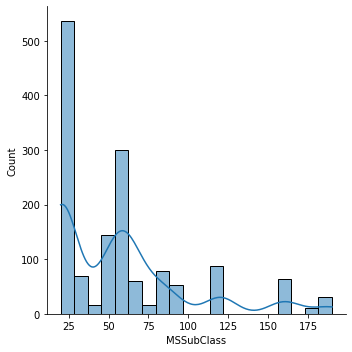

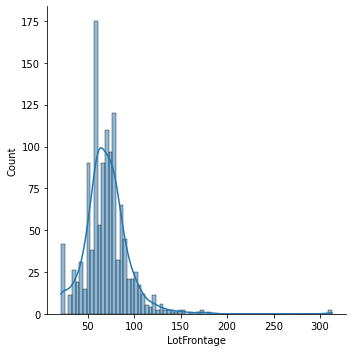

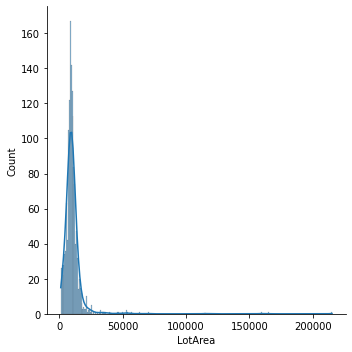

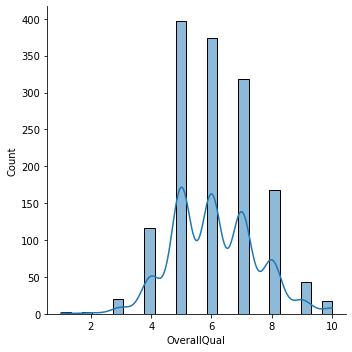

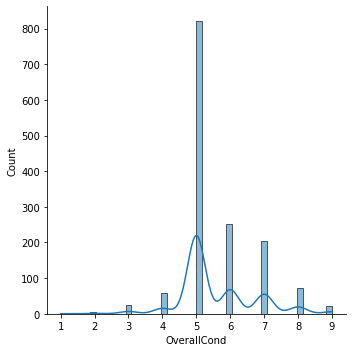

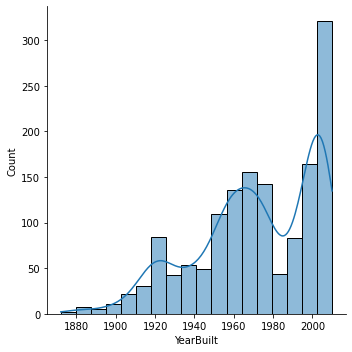

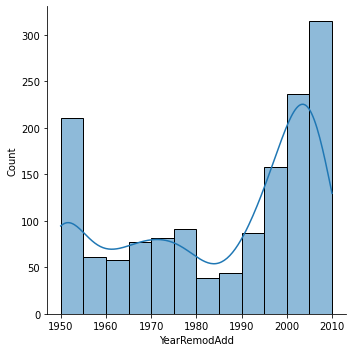

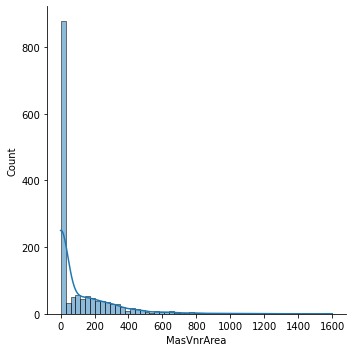

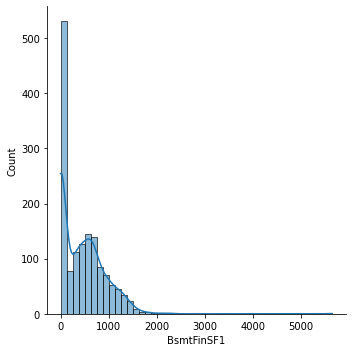

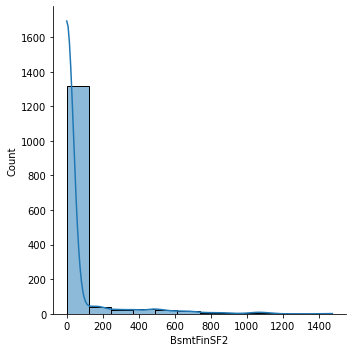

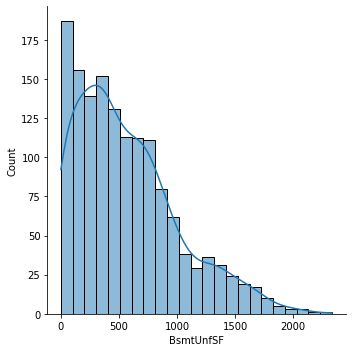

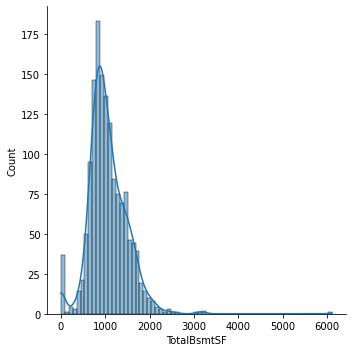

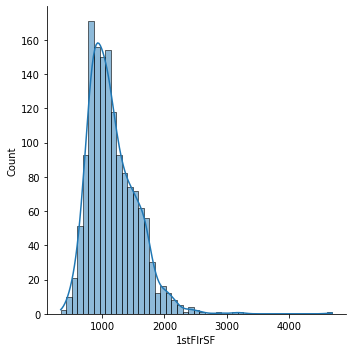

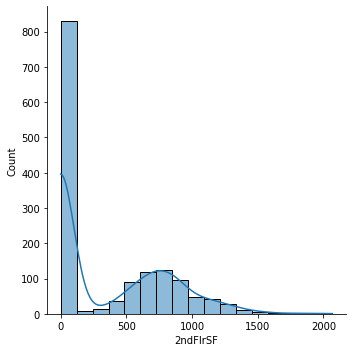

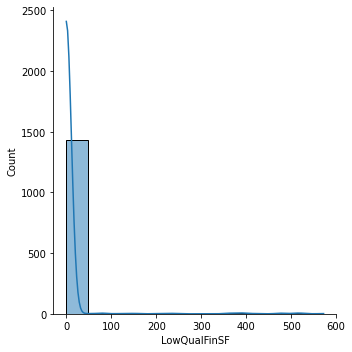

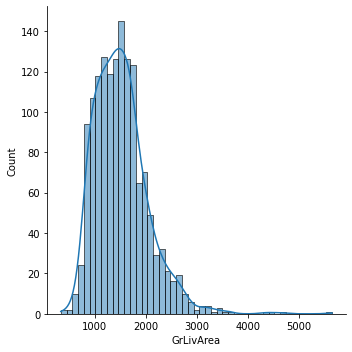

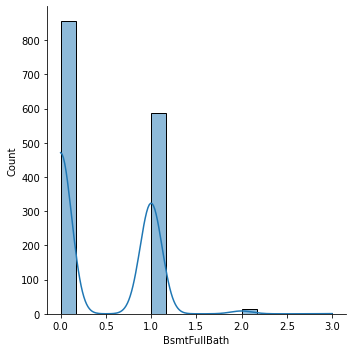

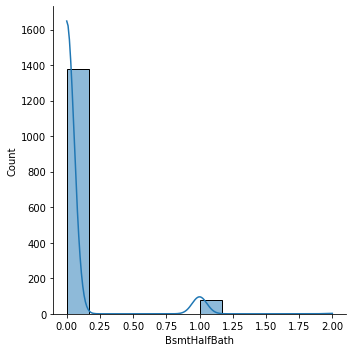

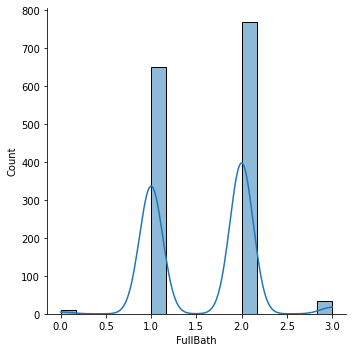

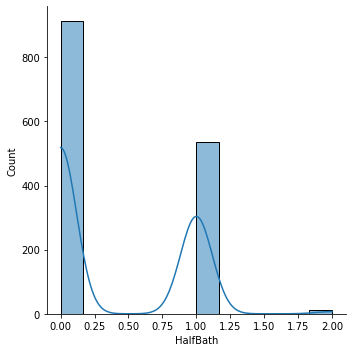

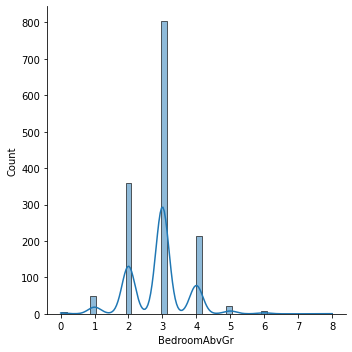

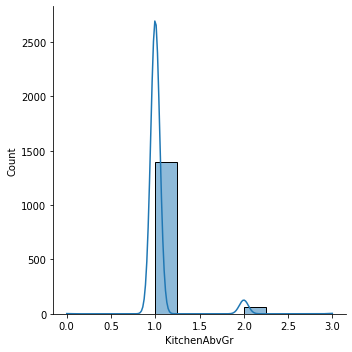

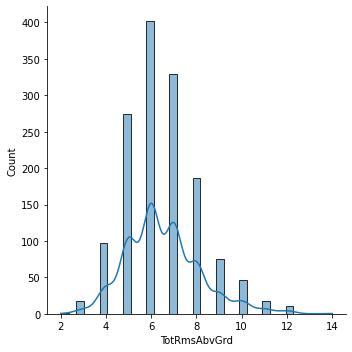

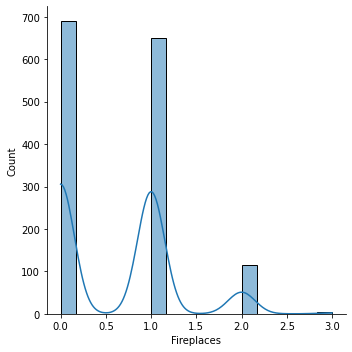

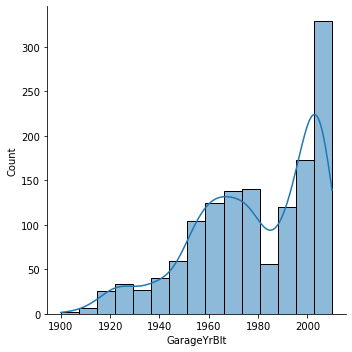

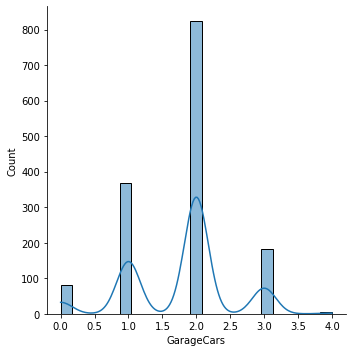

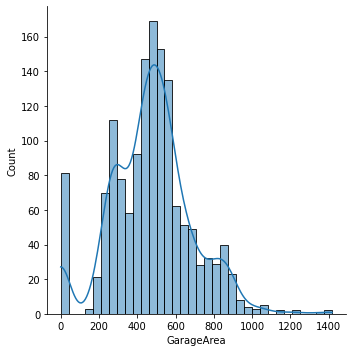

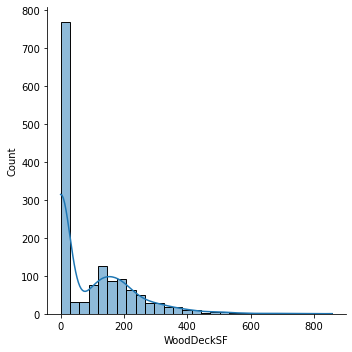

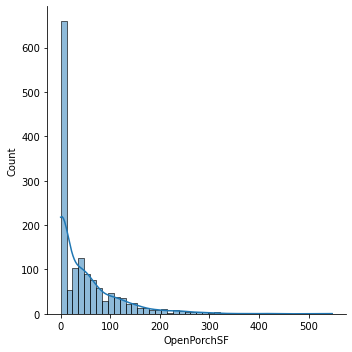

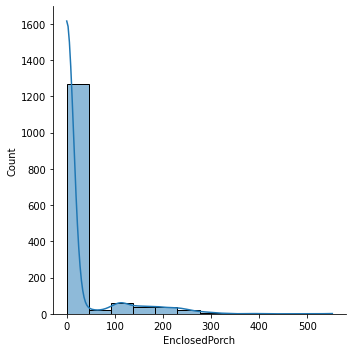

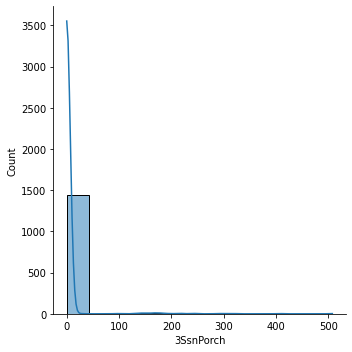

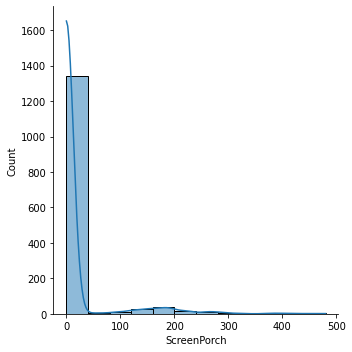

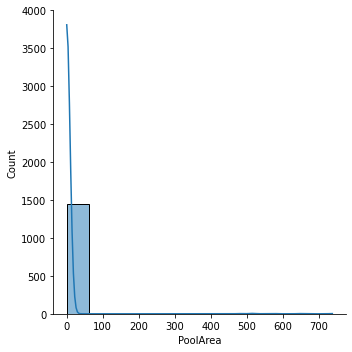

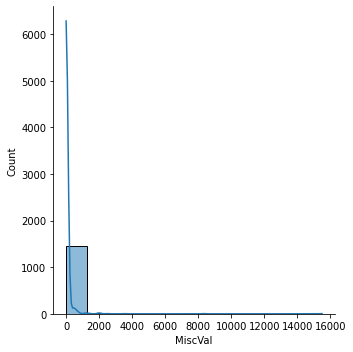

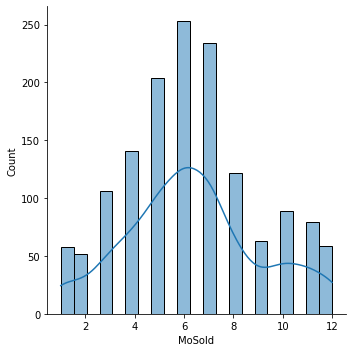

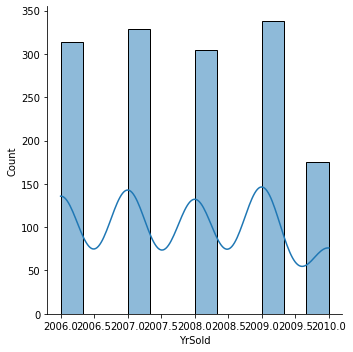

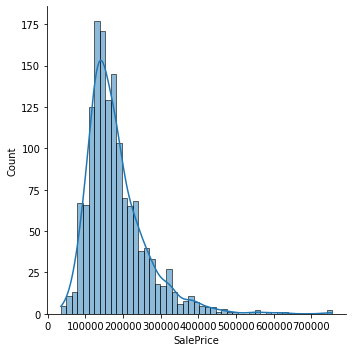

In [10]:
for cuan in numerical.columns:
    sb.displot(df[cuan], kde=True)
    print('\033[1m' + cuan + '\033[0m' + ': \n Kurtosis:', stats.kurtosis(df[cuan]), '\n Skewness:', stats.skew(df[cuan]), '\n')

<AxesSubplot:>

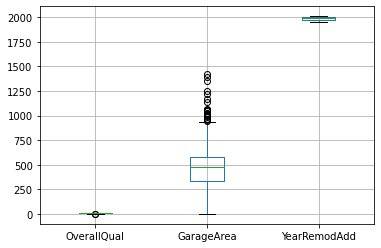

In [11]:
df.boxplot(column=["OverallQual", "GarageArea", "YearRemodAdd"])

### Analizamos las variables cualitativas

MSZoning


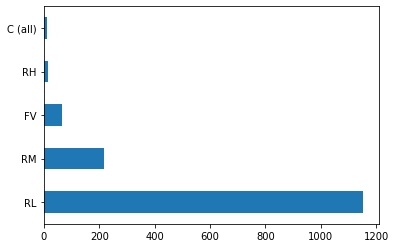

<Figure size 1440x360 with 0 Axes>

Street


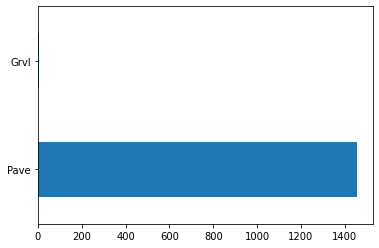

<Figure size 1440x360 with 0 Axes>

Alley


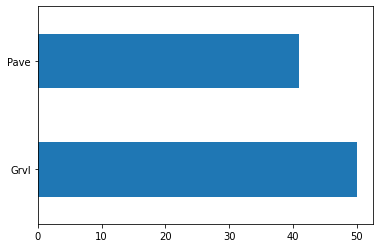

<Figure size 1440x360 with 0 Axes>

LotShape


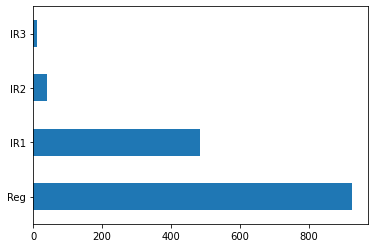

<Figure size 1440x360 with 0 Axes>

LandContour


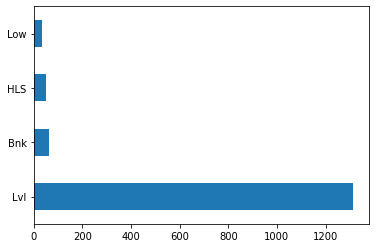

<Figure size 1440x360 with 0 Axes>

Utilities


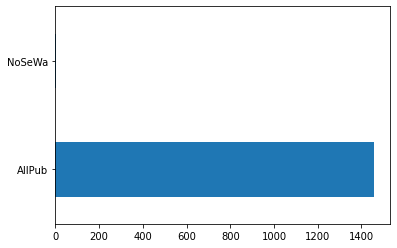

<Figure size 1440x360 with 0 Axes>

LotConfig


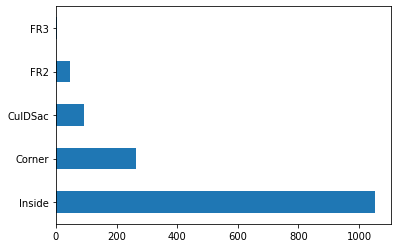

<Figure size 1440x360 with 0 Axes>

LandSlope


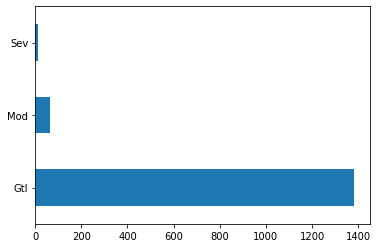

<Figure size 1440x360 with 0 Axes>

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

Condition1


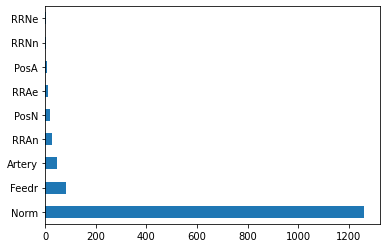

<Figure size 1440x360 with 0 Axes>

Condition2


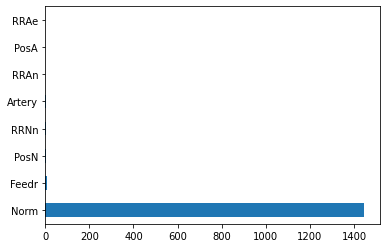

<Figure size 1440x360 with 0 Axes>

BldgType


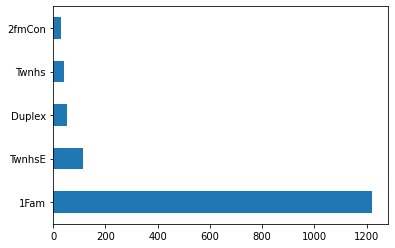

<Figure size 1440x360 with 0 Axes>

HouseStyle


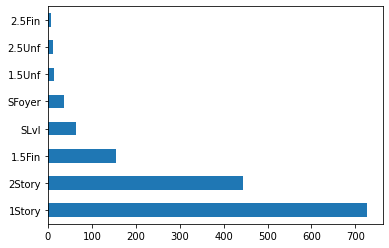

<Figure size 1440x360 with 0 Axes>

RoofStyle


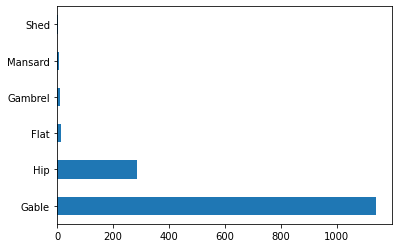

<Figure size 1440x360 with 0 Axes>

RoofMatl


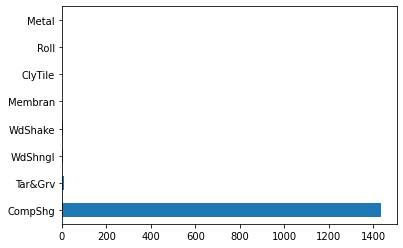

<Figure size 1440x360 with 0 Axes>

Exterior1st


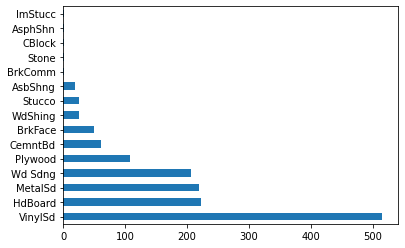

<Figure size 1440x360 with 0 Axes>

Exterior2nd


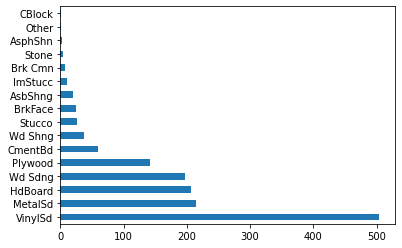

<Figure size 1440x360 with 0 Axes>

MasVnrType


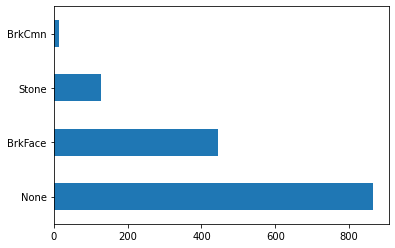

<Figure size 1440x360 with 0 Axes>

ExterQual


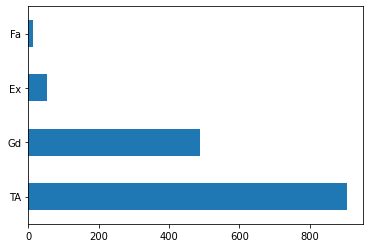

<Figure size 1440x360 with 0 Axes>

ExterCond


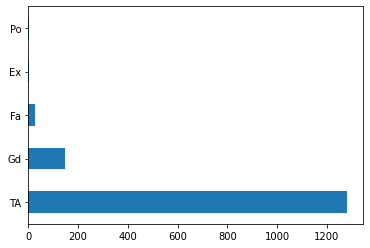

<Figure size 1440x360 with 0 Axes>

Foundation


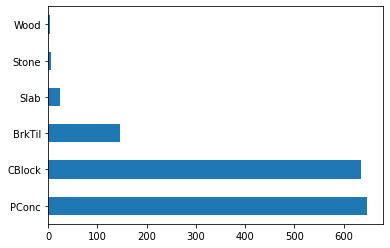

<Figure size 1440x360 with 0 Axes>

BsmtQual


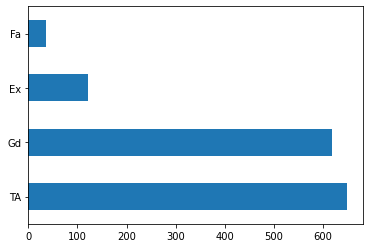

<Figure size 1440x360 with 0 Axes>

BsmtCond


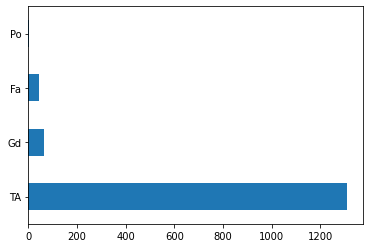

<Figure size 1440x360 with 0 Axes>

BsmtExposure


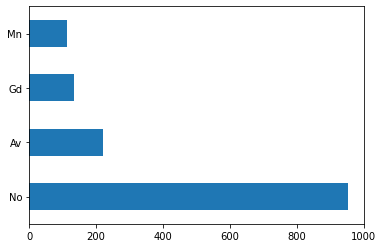

<Figure size 1440x360 with 0 Axes>

BsmtFinType1


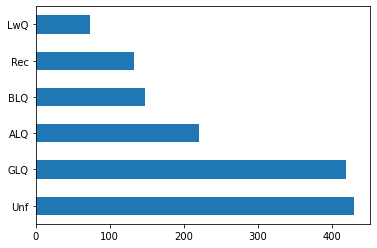

<Figure size 1440x360 with 0 Axes>

BsmtFinType2


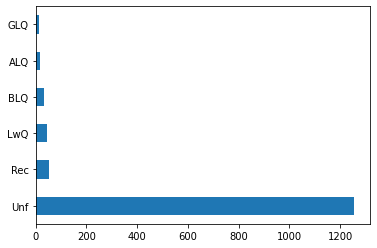

<Figure size 1440x360 with 0 Axes>

Heating


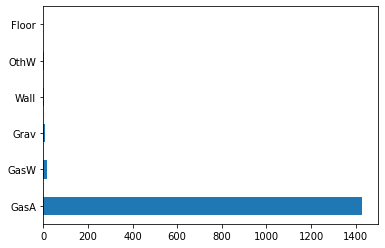

<Figure size 1440x360 with 0 Axes>

HeatingQC


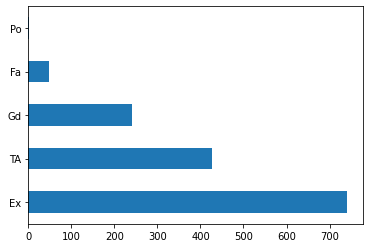

<Figure size 1440x360 with 0 Axes>

CentralAir


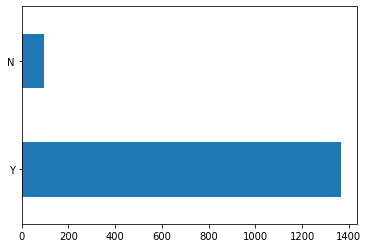

<Figure size 1440x360 with 0 Axes>

Electrical


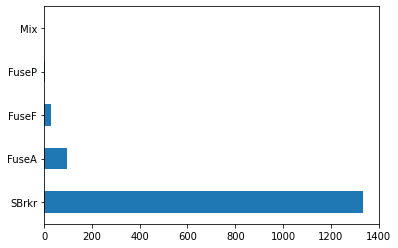

<Figure size 1440x360 with 0 Axes>

KitchenQual


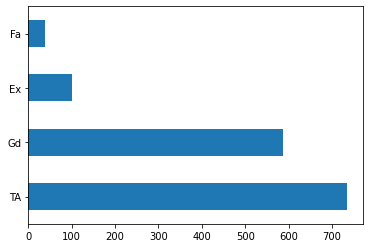

<Figure size 1440x360 with 0 Axes>

Functional


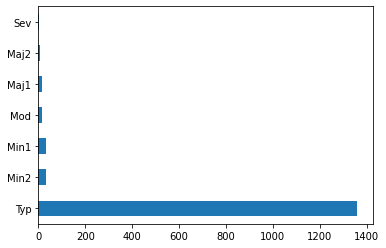

<Figure size 1440x360 with 0 Axes>

FireplaceQu


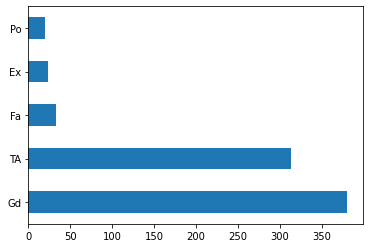

<Figure size 1440x360 with 0 Axes>

GarageType


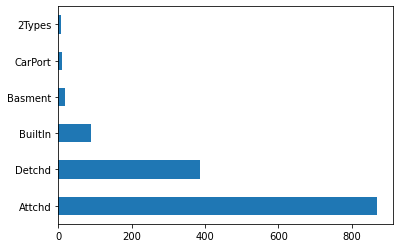

<Figure size 1440x360 with 0 Axes>

GarageFinish


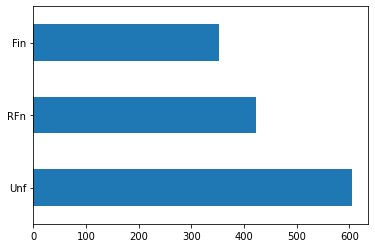

<Figure size 1440x360 with 0 Axes>

GarageQual


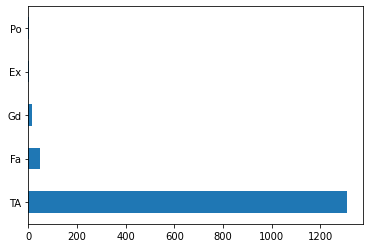

<Figure size 1440x360 with 0 Axes>

GarageCond


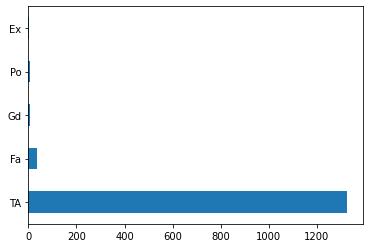

<Figure size 1440x360 with 0 Axes>

PavedDrive


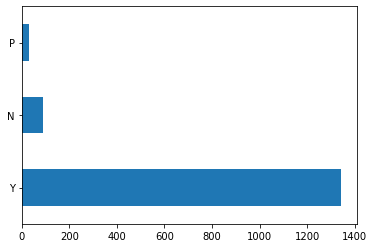

<Figure size 1440x360 with 0 Axes>

PoolQC


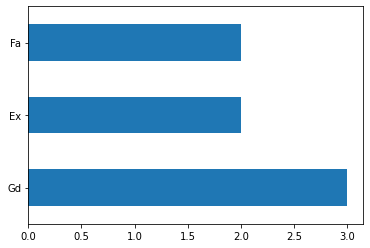

<Figure size 1440x360 with 0 Axes>

Fence


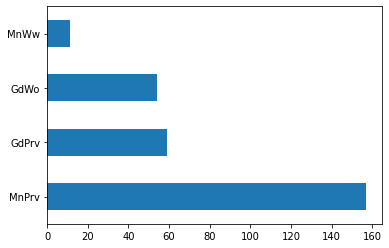

<Figure size 1440x360 with 0 Axes>

MiscFeature


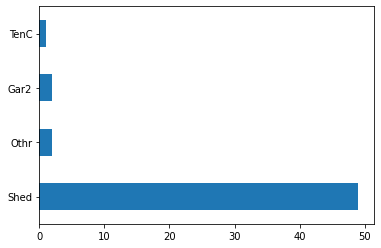

<Figure size 1440x360 with 0 Axes>

SaleType


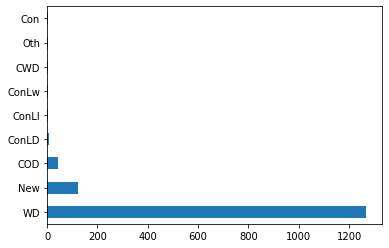

<Figure size 1440x360 with 0 Axes>

SaleCondition


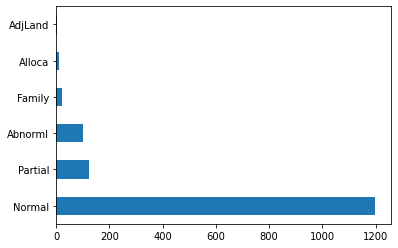

<Figure size 1440x360 with 0 Axes>

In [12]:
pd.set_option("display.max_rows", df.shape[0]+1)
for cual in categorical.columns:
  #Omitimos ID ya que no tiene información relevante
  if(cual == "Id"):
    pass
  #Hacemos una tabla de frecuencias para poder apreciar la información
  elif(cual in ["Neighborhood", "YearBuilt", "YearRemodAdd", "GarageYrBlt"]):
    print(df[cual].value_counts(), "\n")
  else:
    df[cual].value_counts().plot(kind='barh')
    plt.figure(figsize=(20,5))
    print(cual)
    plt.show()

### Analizamos el valor de correlación en las variables cuantitativas

Text(0.5, 1.0, 'Correlacion entre variables categóricas')

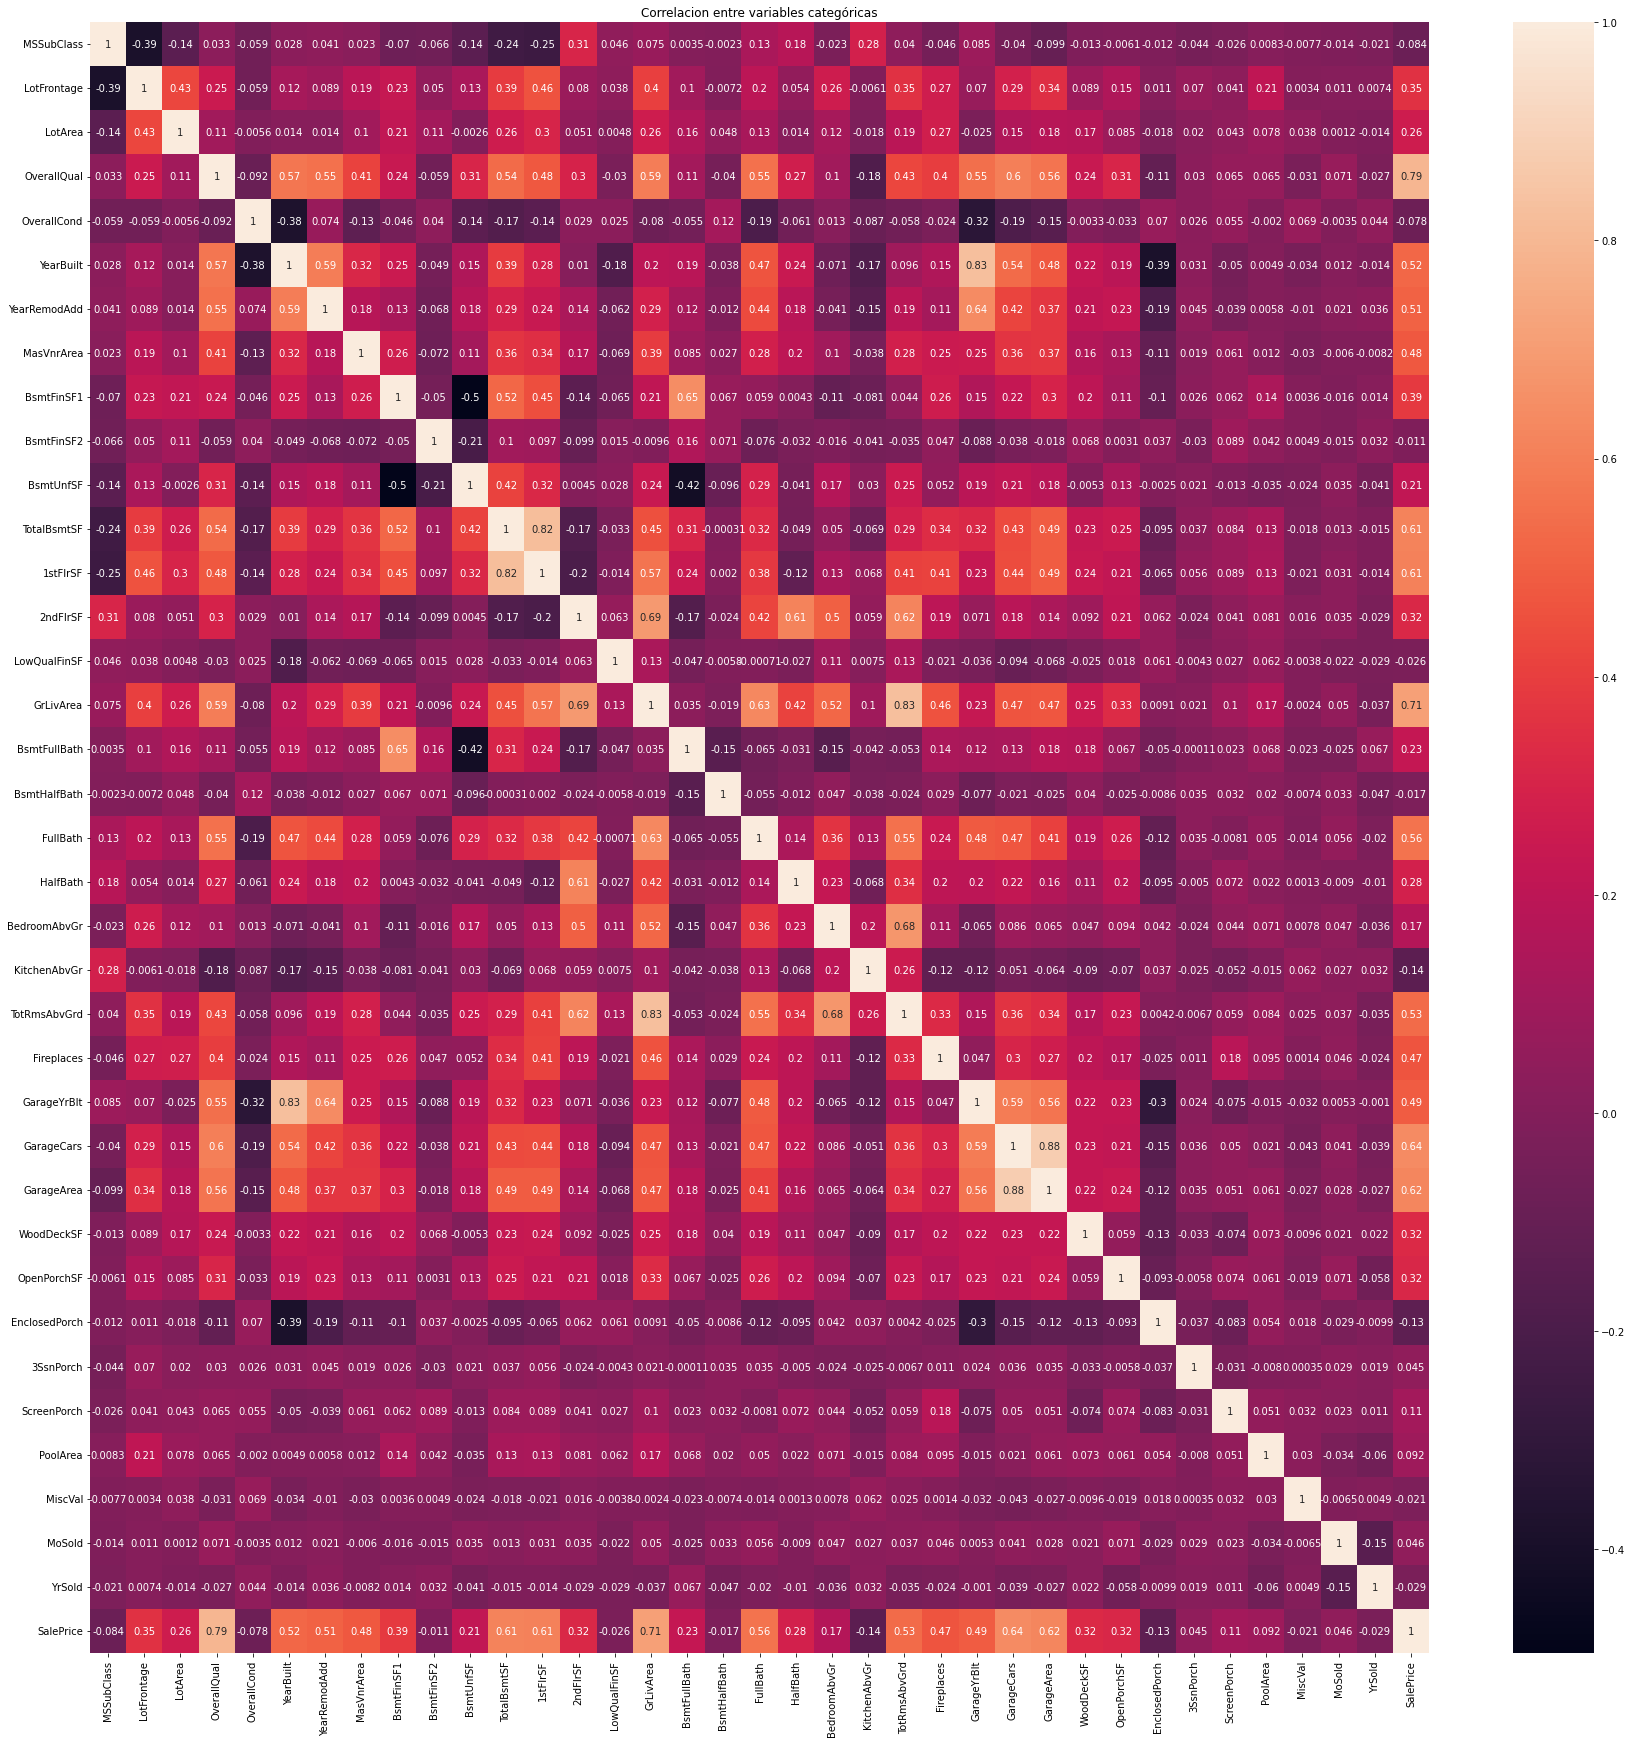

In [13]:
df_corr = df.corr()
f, ax = plt.subplots(figsize=(30,30))
sb.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, ax=ax,annot_kws={'size': 10})
plt.title("Correlacion entre variables categóricas")

### Realizamos una matriz de correlación para "SalesPrice"

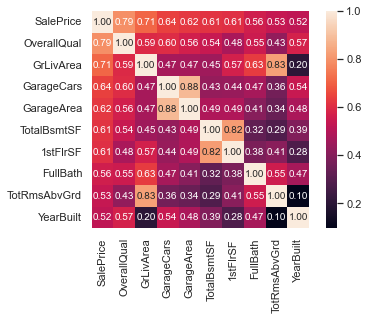

In [14]:
k = 10
corrmat = df.corr()
columns = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[columns].values.T)
sb.set(font_scale=1)
sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

### Obtenemos la relación entre las variables más significativas

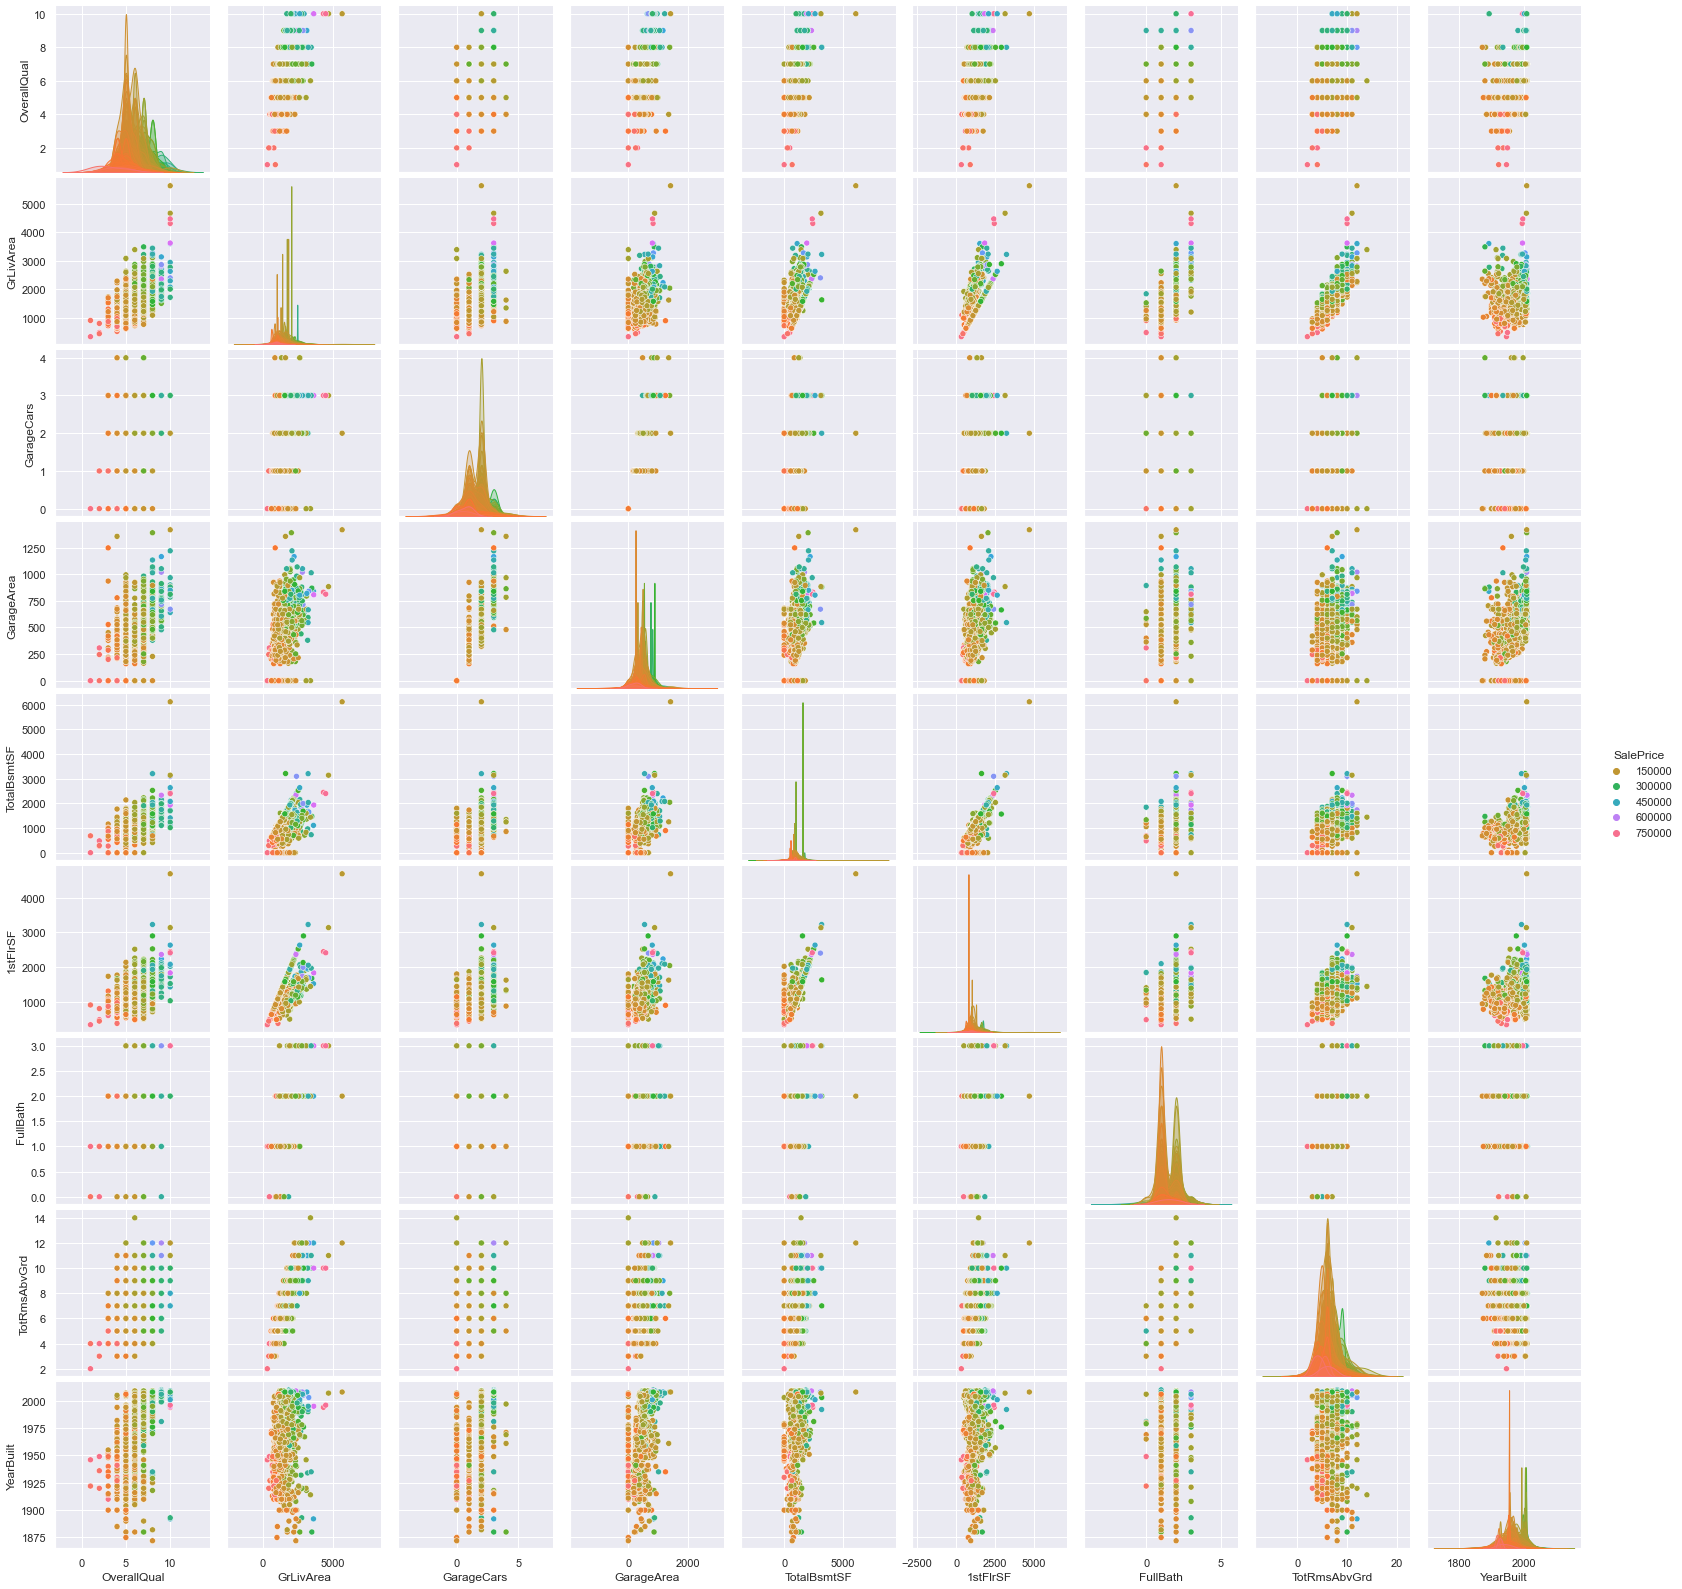

In [15]:
sb.pairplot(df[columns], hue='SalePrice', palette='husl')
plt.show()

## Análisis de componentes principales

- Estudia la matriz de correlación, la agrega y explica lo que observa en ella
- Determina si es posible usar la técnica de análisis factorial para hallar las componentes
principales
- Determina si vale la pena aplicar las componentes principales interpretando el test de
esfericidad de Bartlett
- Obtiene los componentes principales y explica cuántos seleccionará para explicar la mayor
variabilidad posible.
- Interpreta los coeficientes principales.

In [16]:
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from apyori import apriori

In [17]:
copied_df = df.copy()
copied_df = copied_df.fillna(0)
numeric = copied_df[numerical.columns].copy()
numeric

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
5             50         85.0    14115            5            5       1993   
6             20         75.0    10084            8            5       2004   
7             60          0.0    10382            7            6       1973   
8             50         51.0     6120            7            5       1931   
9            190         50.0     7420            5            6       1939   
10            20         70.0    11200            5            5       1965   
11            60         85.0    11924            9            5       2005   
12            20          0.0    12968            5            6       1962   
13            20         91.0    10652            7            5       2006   
14            20          0.0    10920            6            5       1960   
15            45         51.0     6120            7            8       1929   
16            20          0.0    11241            6            7       1970   
17            90         72.0    10791            4            5       1967   
18            20         66.0    13695            5            5       2004   
19            20         70.0     7560            5            6       1958   
20            60        101.0    14215            8            5       2005   
21            45         57.0     7449            7            7       1930   
22            20         75.0     9742            8            5       2002   
23           120         44.0     4224            5            7       1976   
24            20          0.0     8246            5            8       1968   
25            20        110.0    14230            8            5       2007   
26            20         60.0     7200            5            7       1951   
27            20         98.0    11478            8            5       2007   
28            20         47.0    16321            5            6       1957   
29            30         60.0     6324            4            6       1927   
30            70         50.0     8500            4            4       1920   
31            20          0.0     8544            5            6       1966   
32            20         85.0    11049            8            5       2007   
33            20         70.0    10552            5            5       1959   
34           120         60.0     7313            9            5       2005   
35            60        108.0    13418            8            5       2004   
36            20        112.0    10859            5            5       1994   
37            20         74.0     8532            5            6       1954   
38            20         68.0     7922            5            7       1953   
39            90         65.0     6040            4            5       1955   
40            20         84.0     8658            6            5       1965   
41            20        115.0    16905            5            6       1959   
42            85          0.0     9180            5            7       1983   
43            20          0.0     9200            5            6       1975   
44            20         70.0     7945            5            6       1959   
45           120         61.0     7658            9            5       2005   
46            50         48.0    12822            7            5       2003   
47            20         84.0    11096            8            5       2006   
48           190         33.0     4456            4            5       1920   
49            20         66.0     7742            5     

In [18]:
chi_cuadrado, p_valor = calculate_bartlett_sphericity(numeric)
print("Chi-cuadrado:", chi_cuadrado)
print("P-valor:", p_valor)

Chi-cuadrado: 129540.44544566875
P-valor: 0.0


In [19]:
kmo, kmo_p = calculate_kmo(numeric)
print("KMO:", kmo)

KMO: [0.59817237 0.85026903 0.8927587  0.92542465 0.4470575  0.7580651
 0.81777967 0.94055908 0.77921282 0.15219515 0.67896126 0.83248322
 0.68980456 0.57816103 0.06580147 0.74534314 0.64935198 0.28933701
 0.88149491 0.76908777 0.78959868 0.53471864 0.88207953 0.9163147
 0.82146046 0.84978626 0.86461332 0.91143169 0.92972492 0.66492996
 0.57361608 0.59453754 0.73131626 0.43390072 0.52615678 0.5145792
 0.92983084]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


El índice nos indica que es mayor a 0.5, por lo cual valida que se puede realizar un análisis factorial y por consiguiente, un PCA.

## PCA

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
pca_pipe = make_pipeline(StandardScaler(), PCA()) 
pca_pipe.fit(numeric)
modelo_pca = pca_pipe.named_steps['pca']

index = []
for i in range(len(numeric.columns)):
    index.append('PC' + str(i + 1))

pd.DataFrame(
    data = modelo_pca.components_,
    columns = numeric.columns,
    index = index
)

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond  \
PC1  -1.819389e-02  9.421612e-02  1.064500e-01  2.952672e-01 -6.750234e-02   
PC2   1.821430e-01  9.238197e-03 -5.368729e-02 -1.390454e-02  3.816653e-02   
PC3  -1.631320e-01  1.543608e-01  2.821012e-01 -1.360017e-01  1.185605e-01   
PC4  -2.935848e-01  2.187352e-01 -2.421034e-02  9.472991e-03 -9.983929e-02   
PC5   3.244473e-01 -7.430524e-03 -9.193267e-02 -4.621514e-02 -3.922934e-01   
PC6  -3.906996e-02 -3.175343e-02 -5.356784e-02  1.618116e-01  2.079861e-01   
PC7   1.195931e-01 -1.105587e-01  1.908420e-02 -3.739114e-02 -2.142776e-01   
PC8   5.792868e-02 -2.499934e-01  1.751118e-01 -5.340479e-02  2.815590e-01   
PC9  -1.738677e-02  2.303656e-01 -6.801898e-02  4.163198e-02  2.007624e-01   
PC10  6.799871e-03  1.049071e-01 -1.527928e-01  2.495956e-02  2.082686e-01   
PC11  2.223085e-01 -1.793243e-01 -1.120137e-01  9.235776e-02  2.433050e-01   
PC12  1.371363e-01 -3.109929e-01  2.648840e-02  7.654784e-02 -7.123245e-02   
PC13  2.376640e-01  1.053201e-01 -2.017637e-01  6.830199e-03 -1.600704e-02   
PC14 -2.715243e-01  2.018763e-01  1.943324e-01 -1.234577e-01 -2.032571e-01   
PC15  1.299438e-01 -2.981298e-01  1.635856e-01  1.084531e-02 -2.644714e-01   
PC16 -6.265224e-02 -8.118889e-02  9.973756e-02 -6.525965e-02  4.523985e-02   
PC17  8.721863e-02 -6.957497e-02  3.898942e-02 -2.577750e-02  1.439034e-01   
PC18  3.620398e-02 -2.254973e-01  3.569091e-01 -1.197373e-01  1.465204e-01   
PC19 -4.198947e-02 -6.444240e-02  5.753761e-02 -3.916423e-02 -2.933519e-01   
PC20  2.313299e-01  3.917031e-01  6.395080e-01  8.688275e-02 -5.698709e-02   
PC21  2.194592e-01  2.921518e-01  7.522545e-02 -3.717828e-02  1.781569e-01   
PC22 -4.224033e-02 -3.042521e-01  2.566736e-01  7.096717e-03  1.720832e-01   
PC23 -4.302980e-02 -1.080178e-01  2.141559e-01 -6.147009e-02 -1.197947e-01   
PC24 -3.912045e-02 -2.353877e-01  1.747413e-01 -1.474766e-02  5.242922e-02   
PC25 -5.201775e-01 -1.587681e-01 -4.519293e-02 -1.398778e-01 -2.295607e-02   
PC26 -8.885599e-02 -8.939392e-02 -3.200381e-02  1.464104e-01 -4.096861e-03   
PC27 -4.336152e-02  7.893794e-02  6.187292e-02 -5.502203e-02  2.838735e-02   
PC28  2.643088e-01  3.575391e-02 -2.478129e-02 -4.284032e-01  6.310839e-02   
PC29 -1.784644e-02 -1.897094e-02 -4.842650e-02 -3.558009e-01 -2.822026e-01   
PC30 -1.211360e-01  4.261052e-02 -6.617462e-02 -3.695560e-01  1.766496e-01   
PC31 -1.049929e-01 -4.012469e-02 -5.732492e-03  6.724074e-02 -9.825746e-02   
PC32 -8.257841e-02 -1.810605e-02  2.644477e-02  5.134070e-01 -1.466534e-01   
PC33 -3.947824e-02 -1.330694e-02  5.116607e-02  1.590792e-01  1.084238e-01   
PC34 -7.255046e-02  1.586461e-04  1.153803e-02  1.067151e-01  1.102982e-01   
PC35 -4.735142e-02  6.756694e-03  5.266385e-03  4.320767e-03  7.010855e-02   
PC36 -1.726579e-16 -2.358569e-16  3.314207e-17 -2.839086e-16  2.311460e-16   
PC37 -0.000000e+00  2.275312e-16 -2.990225e-17 -1.757813e-16 -1.918523e-16   

         YearBuilt  YearRemodAdd    MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
PC1   2.161289e-01  1.938220e-01  1.901886e-01    0.139159   -0.008553  ...   
PC2  -1.643427e-01 -5.970337e-02 -2.255750e-02   -0.308165   -0.086127  ...   
PC3  -3.583575e-01 -2.770469e-01 -1.746137e-02    0.234849    0.190187  ...   
PC4  -3.963182e-02 -3.130343e-02 -4.071928e-02   -0.300678   -0.084762  ...   
PC5   1.541357e-01  6.741195e-03  5.814882e-02    0.166374   -0.144939  ...   
PC6   8.758640e-02  3.226049e-01 -2.947975e-02    0.009368   -0.057774  ...   
PC7   5.105621e-02 -1.660366e-01  5.180177e-02    0.052664   -0.010473  ...   
PC8   1.674295e-02  1.491586e-01 -2.010656e-02   -0.034964    0.105049  ...   
PC9  -6.845697e-02  1.392326e-01 -9.056339e-02    0.149489   -0.280735  ...   
PC10 -9.850351e-02 -4.593503e-03  2.026068e-01    0.209751   -0.468248  ...   
PC11 -6.596006e-02  1.849028e-01 -2.643110e-01   -0.070316    0.118124  ...   
PC12 -5.959826e-02 -1.398314e-01  3.080385e-01    0.058983   -0.392375  ...   
PC13  7.290736e-

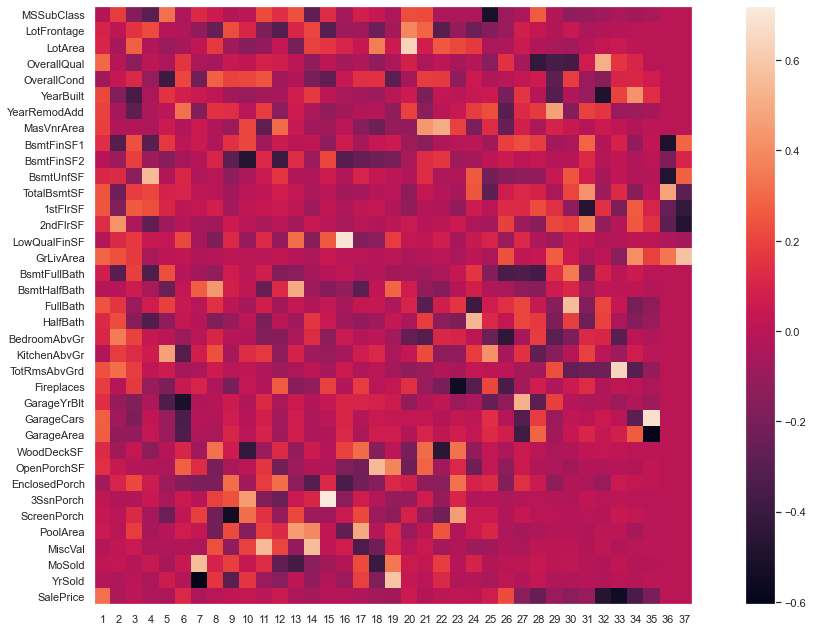

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(numeric.columns)), numeric.columns)
plt.xticks(range(len(numeric.columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
fig.set_size_inches(19, 11, forward=True)
plt.colorbar()

### Varianza por componente

In [23]:
print("Número de componentes:", modelo_pca.n_components_)
print("Explicación de componentes:", "\n", modelo_pca.explained_variance_ratio_)

Número de componentes: 37
Explicación de componentes: 
 [2.05701879e-01 8.62581990e-02 5.94672523e-02 5.54958554e-02
 4.15012521e-02 3.50655750e-02 3.21052642e-02 3.14288209e-02
 3.03267488e-02 2.91445859e-02 2.86582656e-02 2.77084870e-02
 2.74773390e-02 2.67401632e-02 2.58988457e-02 2.47198355e-02
 2.33581519e-02 2.25105198e-02 2.12232056e-02 2.04583016e-02
 1.95779613e-02 1.75041968e-02 1.67954412e-02 1.54844400e-02
 1.28648765e-02 1.07420457e-02 9.55714355e-03 8.07288469e-03
 7.74576777e-03 7.03085651e-03 5.25338211e-03 4.26029717e-03
 3.79493668e-03 3.48470531e-03 2.58251720e-03 4.05675426e-32
 2.43409792e-33]


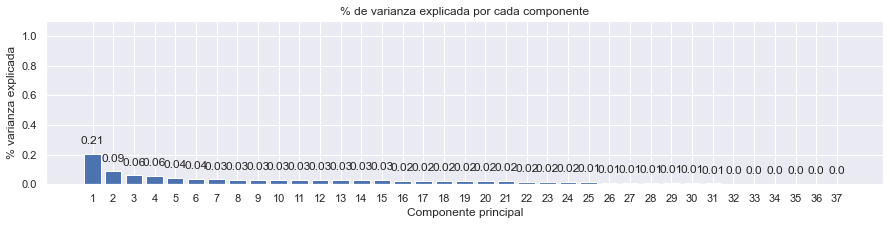

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(numeric.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('% de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('% varianza explicada')
fig.set_size_inches(15, 3, forward=True)

Porcentaje de varianza explicada acumulada
[0.20570188 0.29196008 0.35142733 0.40692319 0.44842444 0.48349001
 0.51559528 0.5470241  0.57735085 0.60649543 0.6351537  0.66286219
 0.69033952 0.71707969 0.74297853 0.76769837 0.79105652 0.81356704
 0.83479025 0.85524855 0.87482651 0.89233071 0.90912615 0.92461059
 0.93747546 0.94821751 0.95777465 0.96584754 0.97359331 0.98062416
 0.98587754 0.99013784 0.99393278 0.99741748 1.         1.
 1.        ]


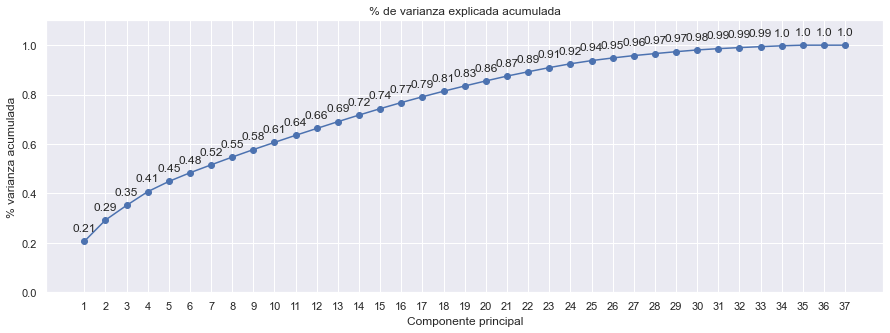

In [25]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(numeric.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(numeric.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('% de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('% varianza acumulada')
fig.set_size_inches(15, 5, forward=True)

## Reglas de asociación
- Construye reglas de asociación usando el algoritmo a priori.
- Discute sobre las reglas de asociación más interesantes teniendo en cuenta sus niveles de
confianza y soporte.

## Hallazgos y conclusiones.
- Hace un resumen de los hallazgos en el análisis exploratorio
- Llega a conclusiones sobre el análisis de componentes principales
- Determina las reglas de asociación más interesantes.